In [1291]:
# Importing all necessary libraries
import pandas as pd 
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [1292]:
leads = pd.read_csv("Leads.csv")
leads.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [1293]:
leads.shape # 9240 rows and 37 columns

(9240, 37)

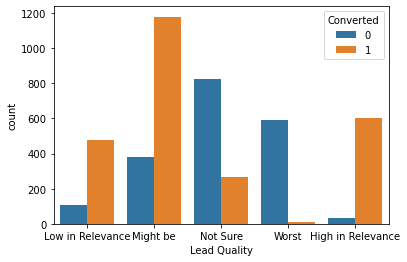

In [1294]:
ax = sns.countplot(x="Lead Quality",hue='Converted', data=leads) # count plots for Lead Quality

[Text(0, 0, 'Select'),
 Text(0, 0, 'Potential Lead'),
 Text(0, 0, 'Other Leads'),
 Text(0, 0, 'Lateral Student'),
 Text(0, 0, 'Dual Specialization Student'),
 Text(0, 0, 'Student of SomeSchool')]

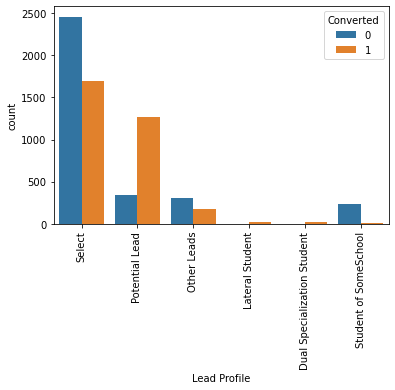

In [1295]:
ax = sns.countplot(x="Lead Profile",hue='Converted', data=leads) # count plots for lead profile
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'Select'),
 Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Thane & Outskirts'),
 Text(0, 0, 'Other Metro Cities'),
 Text(0, 0, 'Other Cities'),
 Text(0, 0, 'Other Cities of Maharashtra'),
 Text(0, 0, 'Tier II Cities')]

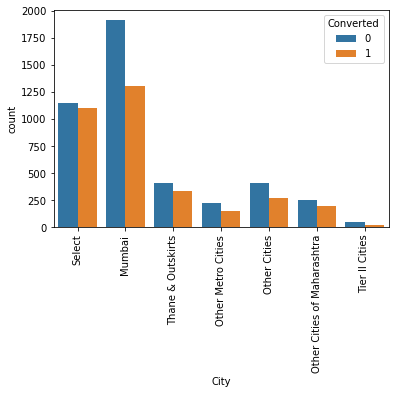

In [1297]:
ax=sns.countplot(x="City",hue='Converted', data=leads) # count plots for City
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [1255]:
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [1256]:
leads.describe()      #Some statistical observations.

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1257]:
def leadprof(x):
    if x=='Potential Lead': #If  it is a potential lead assign 1
        return 1
    else:
        return 0
    
def asymact(x):
    if x>14.306:           #If the value is greater than mean assign 1
        return 1
    else:
        return 0
    
def Totaltime(x):
    if x>487.69:          #If the value is greater than mean assign 1
        return 1
    else:
        return 0

def leadqual(x):
    if x=='High in Relevance':           # Assign 1 if lead is high in relevance.
        return 1
    elif x=='Might be':
        return 1
    else:
        return 0

leads['Lead Profile'] = [leadprof(x) for x in leads['Lead Profile']]
leads['Lead Quality']=[leadqual(x) for x in leads['Lead Quality']]
leads['Asymmetrique Activity Score']=[asymact(x) for x in leads['Asymmetrique Activity Score']]
leads['Total Time Spent on Website']=[Totaltime(x) for x in leads['Total Time Spent on Website']]

leads['Lead Profile']=leads['Lead Profile'].astype('int')  
leads['Lead Quality']=leads['Lead Quality'].astype('int')  

In [1258]:
leads = leads[['Lead Profile', 'Converted','Asymmetrique Profile Score',
               'Asymmetrique Activity Score','Total Time Spent on Website',
               'Page Views Per Visit','TotalVisits','Lead Quality']]                                # altering columns in dataframe
leads['Converted'] = leads['Converted'].astype('int')                                 # keeping only necessary columns
leads.head()

,Lead Profile,Converted,Asymmetrique Profile Score,Asymmetrique Activity Score,Total Time Spent on Website,Page Views Per Visit,TotalVisits,Lead Quality
0,0,0,15.0,1,0,0.0,0.0,0
1,0,0,15.0,1,1,2.5,5.0,0
2,1,1,20.0,0,1,2.0,2.0,1
3,0,0,17.0,0,0,1.0,1.0,0
4,0,1,18.0,1,1,1.0,2.0,1


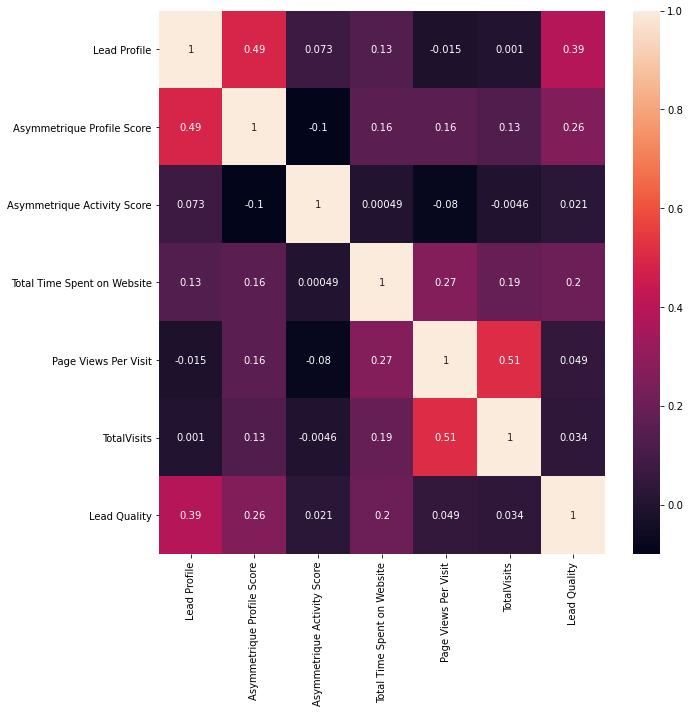

In [1259]:
plt.figure(figsize=[10,10])
sns.heatmap(leads.drop('Converted',axis=1).corr(),annot=True)

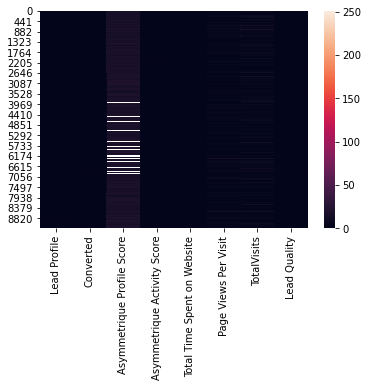

In [1260]:
heat_map = sns.heatmap(leads)  # We can notice alot of missing values in Asymmetric Profile Score.
plt.show()

In [1261]:
leads.dtypes

Lead Profile                     int32
Converted                        int32
Asymmetrique Profile Score     float64
Asymmetrique Activity Score      int64
Total Time Spent on Website      int64
Page Views Per Visit           float64
TotalVisits                    float64
Lead Quality                     int32
dtype: object

In [1262]:
leads.isnull().sum()        #Check for null entries.

Lead Profile                      0
Converted                         0
Asymmetrique Profile Score     4218
Asymmetrique Activity Score       0
Total Time Spent on Website       0
Page Views Per Visit            137
TotalVisits                     137
Lead Quality                      0
dtype: int64

In [1263]:
leads=leads.fillna(0)      #there are 4218 empty entries in 'Asymmetrique Profile Score'.
                           #That's a huge number and we can't drop all 4218 rows.

In [1264]:
leads.isnull().sum()      # Null entries have been taken care of

Lead Profile                   0
Converted                      0
Asymmetrique Profile Score     0
Asymmetrique Activity Score    0
Total Time Spent on Website    0
Page Views Per Visit           0
TotalVisits                    0
Lead Quality                   0
dtype: int64

In [1265]:
leads.describe()

,Lead Profile,Converted,Asymmetrique Profile Score,Asymmetrique Activity Score,Total Time Spent on Website,Page Views Per Visit,TotalVisits,Lead Quality
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.174567,0.385390,8.883550,0.228788,0.347727,2.327787,3.394156,0.237771
std,0.379617,0.486714,8.250664,0.420075,0.476275,2.164258,4.836682,0.425741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,14.000000,0.000000,0.000000,2.000000,3.000000,0.000000
75%,0.000000,1.000000,16.000000,0.000000,1.000000,3.000000,5.000000,0.000000
max,1.000000,1.000000,20.000000,1.000000,1.000000,55.000000,251.000000,1.000000


In [1266]:
leads.dtypes  # All datatypes are integer or float.

Lead Profile                     int32
Converted                        int32
Asymmetrique Profile Score     float64
Asymmetrique Activity Score      int64
Total Time Spent on Website      int64
Page Views Per Visit           float64
TotalVisits                    float64
Lead Quality                     int32
dtype: object

In [1267]:
X = np.asarray(leads[['Lead Profile', 'Asymmetrique Profile Score',                  
                      'Asymmetrique Activity Score','Total Time Spent on Website',   # converting predictors to array
                      'Page Views Per Visit','TotalVisits','Lead Quality']])
X[0:5]

array([[ 0. , 15. ,  1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , 15. ,  1. ,  1. ,  2.5,  5. ,  0. ],
       [ 1. , 20. ,  0. ,  1. ,  2. ,  2. ,  1. ],
       [ 0. , 17. ,  0. ,  0. ,  1. ,  1. ,  0. ],
       [ 0. , 18. ,  1. ,  1. ,  1. ,  2. ,  1. ]])

In [1268]:
y = np.asarray(leads['Converted'])   # converting to array
y [0:5]

array([0, 0, 1, 0, 1])

In [1269]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)    # Fitting the data of the predictors
X[0:5]

array([[-0.46,  0.74,  1.84, -0.73, -1.08, -0.7 , -0.56],
       [-0.46,  0.74,  1.84,  1.37,  0.08,  0.33, -0.56],
       [ 2.17,  1.35, -0.54,  1.37, -0.15, -0.29,  1.79],
       [-0.46,  0.98, -0.54, -0.73, -0.61, -0.5 , -0.56],
       [-0.46,  1.1 ,  1.84,  1.37, -0.61, -0.29,  1.79]])

In [1270]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)  #Split data for 
                                                                                            #testing and training
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7392, 7) (7392,)
Test set: (1848, 7) (1848,)


In [1271]:
from sklearn.linear_model import LogisticRegression                         #importing Logistic Regression.
from sklearn.metrics import confusion_matrix                                #importing confusion matrix.
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)    # fit the final model
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [1272]:
predictions=LR.predict(X_test)                           # Predicting using test dataset

In [1273]:
from sklearn.metrics import classification_report        #importing classification report

In [1274]:
print(classification_report(y_test,predictions))     #classification report

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1127
           1       0.76      0.67      0.71       721

    accuracy                           0.79      1848
   macro avg       0.78      0.77      0.77      1848
weighted avg       0.78      0.79      0.78      1848



In [1275]:
from sklearn.metrics import accuracy_score             #importing accuracy score to check accuracy

In [1276]:
accuracy_score(y_test,predictions)                      #accuracy

0.7867965367965368

In [1277]:
yhat = LR.predict(X_test)                # predicting class of the new data instances using our classification model
yhat

array([0, 1, 0, ..., 1, 1, 0])

In [1278]:
test = LR.predict_proba(X_test)        # predicting probability that the lead gets converted
test

array([[0.85, 0.15],
       [0.06, 0.94],
       [0.84, 0.16],
       ...,
       [0.07, 0.93],
       [0.08, 0.92],
       [0.83, 0.17]])

In [1279]:
test=[i[0]*100 for i in test] 

In [1280]:
test     # probability that the lead is likely to get converted

[84.77565350068194,
 6.479111950614758,
 83.64028649892674,
 91.84060149627359,
 87.45546868606081,
 33.71570998450305,
 92.52272370109736,
 25.172363375193086,
 81.65410006578897,
 78.8990172933834,
 39.85590257143345,
 90.66148651641653,
 87.45546868606081,
 49.49035783821424,
 13.249424034086488,
 67.89267951242873,
 73.70501190352297,
 90.26857425453957,
 86.67347037738102,
 38.17624897606113,
 10.58986682529527,
 10.58986682529527,
 89.7207735724842,
 8.723875085124266,
 69.65283540090788,
 59.41999916585618,
 83.21517706007741,
 91.47001106874283,
 91.88718538746802,
 10.104475682253156,
 86.16996147995725,
 81.64352435243948,
 73.70501190352297,
 81.64352435243948,
 87.45546868606081,
 24.098304013552152,
 81.64352435243948,
 35.182367349770026,
 51.578589716231505,
 31.819382115210505,
 83.2680701386849,
 27.107202047502287,
 81.64352435243948,
 41.95669068942347,
 57.32809316933285,
 79.9898286710716,
 89.7207735724842,
 37.70285805947092,
 27.6012073149407,
 76.58139920419582

In [1281]:
train=LR.predict_proba(X_train)   
train

array([[0.11, 0.89],
       [0.86, 0.14],
       [0.86, 0.14],
       ...,
       [0.12, 0.88],
       [0.7 , 0.3 ],
       [0.68, 0.32]])

In [1282]:
ypred = pd.DataFrame({'Pred': pd.Series(test)}) # making a new dataframe called 'ypred' with column name 'Pred'

In [1283]:
df_total = pd.concat([leads, ypred], axis=1)  # Concatenating Df 'Pred' with Df 'ypred'

In [1298]:
df_total.head(5)   # Pred column contains scores from 0 to 100 
                    # to check for chances of a lead ro get converted 

,Lead Profile,Converted,Asymmetrique Profile Score,Asymmetrique Activity Score,Total Time Spent on Website,Page Views Per Visit,TotalVisits,Lead Quality,Pred
0,0,0,15.0,1,0,0.0,0.0,0,84.775654
1,0,0,15.0,1,1,2.5,5.0,0,6.479112
2,1,1,20.0,0,1,2.0,2.0,1,83.640286
3,0,0,17.0,0,0,1.0,1.0,0,91.840601
4,0,1,18.0,1,1,1.0,2.0,1,87.455469


In [1285]:
df_total.shape

(9240, 9)

In [1286]:
leads.shape

(9240, 8)

In [1287]:
leads.head()

,Lead Profile,Converted,Asymmetrique Profile Score,Asymmetrique Activity Score,Total Time Spent on Website,Page Views Per Visit,TotalVisits,Lead Quality
0,0,0,15.0,1,0,0.0,0.0,0
1,0,0,15.0,1,1,2.5,5.0,0
2,1,1,20.0,0,1,2.0,2.0,1
3,0,0,17.0,0,0,1.0,1.0,0
4,0,1,18.0,1,1,1.0,2.0,1


In [1288]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,             
                          title='Confusion matrix',    # Set title of the matrix
                          cmap=plt.cm.Blues):          # Set color

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]   # normalize= False
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')    # this will execute since we've set normalisation as false

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)                                    # Plot title
    plt.colorbar()                                      # the bar next to the matrix
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)        # Set xticks
    plt.yticks(tick_marks, classes)                     # Set yticks

    fmt = '.2f' if normalize else 'd'                   
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')                           # x label
    plt.xlabel('Predicted label')                     # y label
print(confusion_matrix(y_test, yhat, labels=[1,0]))    # Printing confusion matrix

[[484 237]
 [157 970]]


Confusion matrix, without normalization
[[484 237]
 [157 970]]


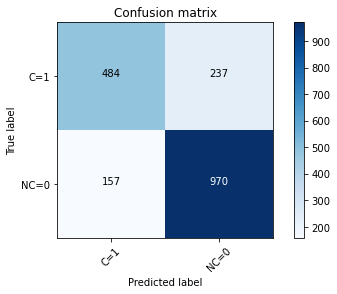

In [1289]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C=1','NC=0'],normalize= False,  title='Confusion matrix')